In [3]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"  

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,  MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [4]:
physical_devices = tf.config.list_physical_devices('GPU') 
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
    tf.config.log_device_placement = True  # to log device placement (on which device the operation ran)
except: 
    print("not")

not


In [5]:
data = ImageDataGenerator()
traindata = data.flow_from_directory(directory="..\\data\\imgs\\train",target_size=(224, 224))
testdata = data.flow_from_directory(directory="..\\data\\imgs\\test", target_size=(224, 224))

Found 22424 images belonging to 10 classes.
Found 22424 images belonging to 10 classes.


In [6]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=10, activation="softmax"))

In [5]:
# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 ,3)),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(10)
# ])

In [19]:
# Adam compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
# model.compile(optimizer="adam",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [12]:
histE = model.fit(traindata, 
          epochs = 10,
          steps_per_epoch = 2, 
          validation_steps = 2,
          )

Epoch 1/10
2/2 [==============================] - 48s 24s/step - loss: 2.2893 - accuracy: 0.1875
Epoch 2/10
2/2 [==============================] - 52s 26s/step - loss: 2.3052 - accuracy: 0.1094
Epoch 3/10
2/2 [==============================] - 50s 25s/step - loss: 2.2884 - accuracy: 0.1094
Epoch 4/10
2/2 [==============================] - 53s 26s/step - loss: 2.2992 - accuracy: 0.1094
Epoch 5/10
2/2 [==============================] - 53s 27s/step - loss: 2.3036 - accuracy: 0.0938
Epoch 6/10
2/2 [==============================] - 52s 26s/step - loss: 2.3075 - accuracy: 0.0625
Epoch 7/10
2/2 [==============================] - 53s 27s/step - loss: 2.2956 - accuracy: 0.1562
Epoch 8/10
2/2 [==============================] - 59s 29s/step - loss: 2.2944 - accuracy: 0.1562
Epoch 9/10
2/2 [==============================] - 56s 28s/step - loss: 2.2991 - accuracy: 0.0938
Epoch 10/10
2/2 [==============================] - 55s 27s/step - loss: 2.3045 - accuracy: 0.0469


In [21]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=50, verbose=1, mode='auto')
print("ready")

ready


In [22]:
hist = model.fit(
    traindata,
    steps_per_epoch= 20,
    epochs=100,
#     validation_split= .1,
    validation_steps=10,
#     callbacks=[checkpoint,early]
)

Epoch 1/100
20/20 [==============================] - 434s 22s/step - loss: 2.3722 - accuracy: 0.1281
Epoch 2/100
20/20 [==============================] - 423s 21s/step - loss: 2.2984 - accuracy: 0.1125
Epoch 3/100
20/20 [==============================] - 419s 21s/step - loss: 2.3003 - accuracy: 0.1000
Epoch 4/100
20/20 [==============================] - 419s 21s/step - loss: 2.2997 - accuracy: 0.1344
Epoch 5/100
20/20 [==============================] - 418s 21s/step - loss: 2.3151 - accuracy: 0.1141
Epoch 6/100
20/20 [==============================] - 418s 21s/step - loss: 2.3021 - accuracy: 0.1047
Epoch 7/100
20/20 [==============================] - 417s 21s/step - loss: 2.3041 - accuracy: 0.1047
Epoch 8/100
20/20 [==============================] - 417s 21s/step - loss: 2.3541 - accuracy: 0.1078
Epoch 9/100
20/20 [==============================] - 418s 21s/step - loss: 2.4237 - accuracy: 0.1141
Epoch 10/100
20/20 [==============================] - 421s 21s/step - loss: 2.5834 - accura

20/20 [==============================] - 411s 21s/step - loss: 2.3000 - accuracy: 0.1109
Epoch 82/100
20/20 [==============================] - 411s 21s/step - loss: 2.3007 - accuracy: 0.1125
Epoch 83/100
20/20 [==============================] - 411s 21s/step - loss: 2.2992 - accuracy: 0.0953
Epoch 84/100
20/20 [==============================] - 411s 21s/step - loss: 2.3001 - accuracy: 0.1219
Epoch 85/100
20/20 [==============================] - 412s 21s/step - loss: 2.2994 - accuracy: 0.1266
Epoch 86/100
20/20 [==============================] - 412s 21s/step - loss: 2.3013 - accuracy: 0.1000
Epoch 87/100
20/20 [==============================] - 411s 21s/step - loss: 2.3011 - accuracy: 0.1016
Epoch 88/100
20/20 [==============================] - 411s 21s/step - loss: 2.3002 - accuracy: 0.1297
Epoch 89/100
20/20 [==============================] - 413s 21s/step - loss: 2.3017 - accuracy: 0.1031
Epoch 90/100
20/20 [==============================] - 411s 21s/step - loss: 2.3002 - accuracy: 

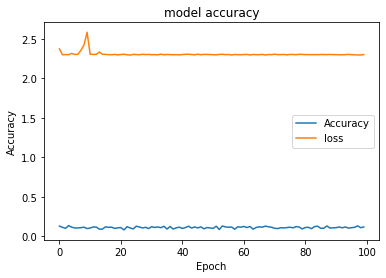

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
# plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [ ]:
# img = testdata[120]
# # plt.imshow(img)
# print(img.shape)
# img_class = model.predict_classes(img)
# saved_model = load_model("vgg16_1.h5")
# # output = saved_model.predict(img)

# # print(output)
# print(saved_model.predict_classes(img))

In [24]:
print(model.predict(testdata))

[[0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]
 [0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]
 [0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]
 ...
 [0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]
 [0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]
 [0.11323359 0.09860019 0.10700713 ... 0.08644512 0.08319972 0.09172932]]


In [33]:
score = model.evaluate(testdata)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

701/701 [==============================] - 5307s 8s/step
Test loss: 2.27602481842041 / Test accuracy: 0.11099714785814285
